<h1>Predicting Diamond Prices</h1>
<h2>Phase 1: Data Preparation & Visualisation</h2>
<h4>Group Name: Group 15</h4>
<h5>Name: Evelyn Lie (s3951140)</h5>
<h5>Name: Edward Lim Padmajaya (s3957503)</h5>
<h5>Name: Go Chee Kin (s3955624)</h5>
<h5>Name: Frandom Leo Inovejas (s3923193)</h5>

<h2>Table Of Contents</h2>
<ul>
    <li>Introduction</li>
        <ul style = "list-style-type:square">
            <li>Phase 1 Summary</li>
            <li>Report Overview</li>
            <li>Overview of Methodology</li>
        </ul>
    <li>Statistical Modelling</li>
        <ul style = "list-style-type:square">
            <li>Full Model Overview</li>
            <li>Full Model Diagnostic Checks</li>
            <li>Backward Feature Selection</li>
            <li>Reduced Model Overview</li>
            <li>Reduced Model Diagnostic Checks</li>
        </ul>
    <li>Critique and Limitations</li>
    <li>Summary and Conclusion</li>
        <ul style = "list-style-type:square">
            <li>Project Summary</li>
            <li>Summary of Findings</li>
            <li>Conclusions</li>
        </ul>
</ul>

<h3><b>Introduction</b></h3>
<h4>Phase 1 Summary</h4>
<p>In our Phase 1 report, we have conducted some data cleaning by removing outliers in the diamond carat's feature and also check for missing values, which resulted in none for all attributes in the "diamonds" dataset. This is done so that in our Phase 2 report, we can </p>

<h4>Report Overview</h4>

<h4>Overview of Methodology</h4>

<h3><b>Statistical Modelling</b></h3>
<h5>Module Imports</h5>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group15.csv')

<h4>Full Model Overview</h4>
<p>Using all of the features in this dataset, we first construct a multiple linear regression that forecasts the price of diamonds.</p>

In [34]:
formula_string_indep_vars = ' + '.join(df.drop(columns='price').columns)
formula_string = 'price ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  price ~ carat + cut + color + clarity + depth + table + x + y + z


In the code chunk below, we use the get_dummies() function in Pandas for one-hot-encoding of categorical features and then we construct a new formula string with the encoded features. But first we need to replace the whitespace in the cut quality categorical feature with an underscore sign. This is because it contains a variable called "Very Good" and the Statsmodels module would output an "invalid syntax" error because of the whitespace.

In [35]:
# Replace the whitespace with underscore for all variable that has a whitespace
categoricalColumns = df.columns[df.dtypes==object].tolist()
for col in categoricalColumns:
    df[col] = df[col].str.replace(' ', '_')

data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [36]:
formula_string_indep_vars_encoded = ' + '.join(data_encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


Now that we have defined our statistical model formula as a Python string, we fit an OLS (ordinary least squares) model to our encoded data.

In [37]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:25:48   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2184.4774    408.197      5.352

<h4><b>FIX THIS</b></h4>
The full model has an adjusted R-squared value of 0.920, which means that only 92% of the variance is explained by the model. By looking at the p-values, we observe that the majority of them are highly significant, though there are a 1 insignificant variable, which is the y variable.

Let's define a new data frame for actual price vs. predicted price and the residuals for the full model. We will use this data frame when plotting predicted values and the regression residuals.

In [40]:
residuals_full = pd.DataFrame({'actual': data_encoded['price'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,326,-1346.364288,1672.364288
1,326,-664.595411,990.595411
2,327,211.107106,115.892894
3,334,-830.737177,1164.737177
4,335,-3459.224220,3794.224220
5,336,-1380.487569,1716.487569
6,336,-397.875201,733.875201
7,337,-1073.323502,1410.323502
8,337,-1040.023136,1377.023136
9,338,-420.417884,758.417884


<h4><b>FIX THIS</b></h4>
The plot below is using the price values and the predicted price values. From Figure 1, we observe that the model never produces a prediction above ?? even though the highest price in the dataset is ??.

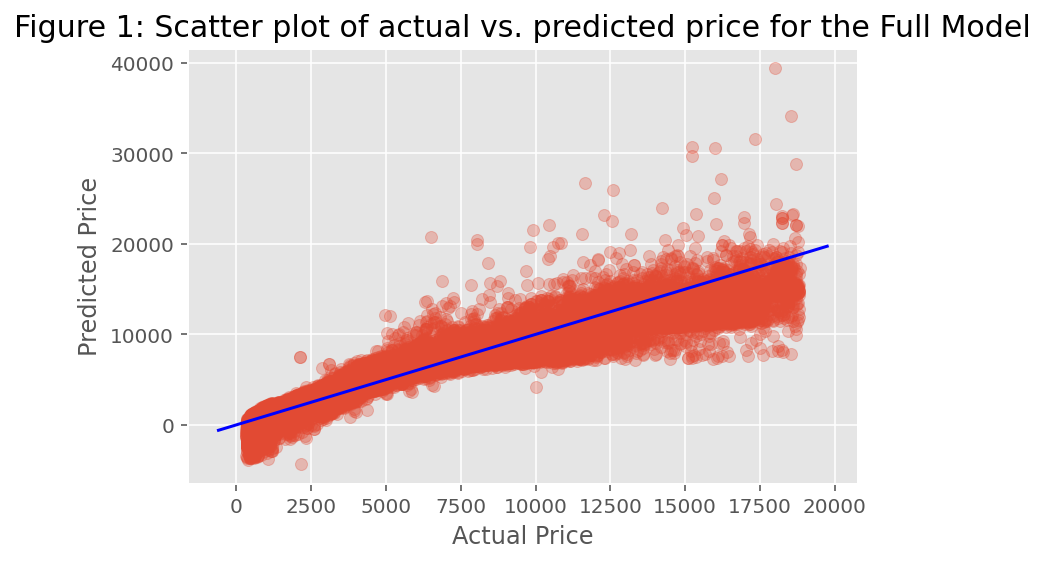

In [44]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3)
plot_line(axis=plt.gca(), slope=1, intercept=0, c="blue")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Figure 1: Scatter plot of actual vs. predicted price for the Full Model', fontsize=15)
plt.show()

<h4>Full Model Diagnostic Checks</h4>

<h4>Backward Feature Selection</h4>

<h4>Reduced Model Overview</h4>

<h4>Reduced Model Diagnostic Checks</h4>

<h3><b>Critique and Limitations</b></h3>

<h3><b>Summary and Conclusions</b></h3>
<h4>Project Summary</h4>

<h4>Summary of Findings</h4>

<h4>Conclusions</h4>